# Tarea 1

Andrés Lueiza Colipi

## Pregunta 1


In [11]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

H0 = 67.4  # km/s/Mpc
omegar0 = 8.24 * 10**(-5)
zl = 1000
zs = np.linspace(0, 10, zl)
c = 3 * 10**5
w = -1

def hubble(z, w, omegam0, omegal0):
    omegam0 = np.asarray(omegam0)
    omegal0 = np.asarray(omegal0)
    z = np.asarray(z)

    omegak0 = 1 - omegam0[:, None] - omegal0[None, :] - omegar0
    H = H0 * np.sqrt(omegar0 * (1 + z[:, None, None])**4 + 
                     omegam0[None, :, None] * (1 + z[:, None, None])**3 + 
                     omegal0[None, None, :] * (1 + z[:, None, None])**(3 * (1 + w)) + 
                     omegak0[None, :, :] * (1 + z[:, None, None])**2)
    return H

def f_k(z, w, omegam0, omegal0):
    e = hubble(z, w, omegam0, omegal0) / H0
    omegak0 = 1 - np.asarray(omegam0)[:, None] - np.asarray(omegal0)[None, :] - omegar0

    # Integramos 1/e(z) en función de z
    int_e = np.array([
        [integrate.trapz(1 / e[:, i, j], dx=10/zl) for j in range(len(omegal0))]
        for i in range(len(omegam0))
    ])
    
    # Calculamos fk en función del valor de omegak0
    fk = np.where(omegak0 > 0, 
                  c / (H0 * np.sqrt(omegak0)) * np.sinh(np.sqrt(omegak0) * int_e),
                  np.where(omegak0 == 0, 
                           c / H0 * int_e, 
                           c / (H0 * np.sqrt(-omegak0)) * np.sin(np.sqrt(-omegak0) * int_e)))
    
    return fk

# Valores para omegam0 y omegal0
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

fk1 = f_k(zs, w, x, y)

zs = np.linspace(0, 20, 1000)

fk2 = f_k(zs, w, x, y)

zs = np.linspace(0, 5, 1000)

fk3 = f_k(zs, w, x, y)

C:\Users\lueiz\AppData\Local\Temp\ipykernel_17328\3585484977.py:36: RuntimeWarning: invalid value encountered in sqrt
  c / (H0 * np.sqrt(omegak0)) * np.sinh(np.sqrt(omegak0) * int_e),
C:\Users\lueiz\AppData\Local\Temp\ipykernel_17328\3585484977.py:39: RuntimeWarning: invalid value encountered in sqrt
  c / (H0 * np.sqrt(-omegak0)) * np.sin(np.sqrt(-omegak0) * int_e)))


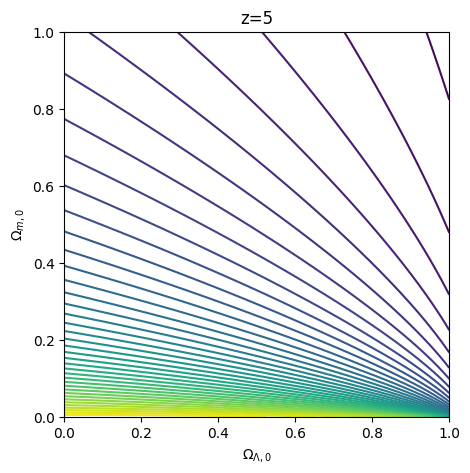

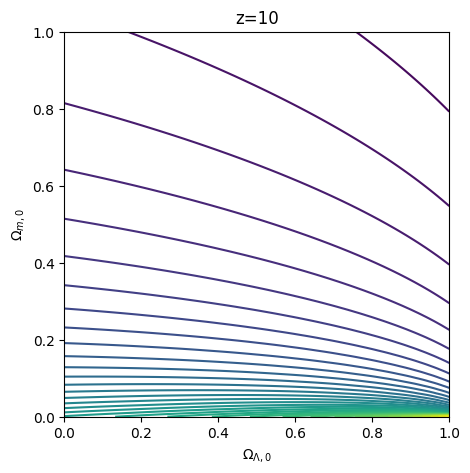

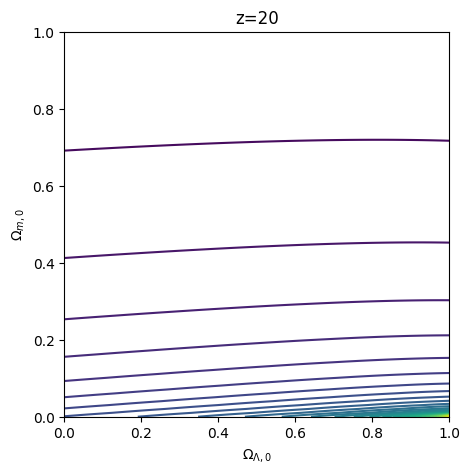

In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,aspect='equal') 
ax.contour(x,y,fk3,levels=40)
plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=5')
plt.show()


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,aspect='equal') 
ax.contour(x,y,fk1,levels=40)
plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=10')
plt.show()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,aspect='equal') 
ax.contour(x,y,fk2,levels=40)
plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=20')
plt.show()
